# A First Look at the SDSS Photometric "Galaxy" Catalog

* The Sloan Digital Sky Survey imaged over 10,000 sq degrees of sky (about 25% of the total), automatically detecting, measuring and cataloging millions of "objects".


* While the primary data products of the SDSS was (and still are) its spectroscopic surveys, the photometric survey provides an important testing ground for dealing with pure imaging surveys like those being carried out by DES and that is planned with LSST.


* Let's download part of the SDSS photometric object catalog and explore it.

SDSS data release 12 (DR12) is described [at the SDSS3 website](http://www.sdss.org/dr12/) and in the survey paper by [Alam et al 2015](http://arxiv.org/abs/1501.00963). 


We will use the [SDSS DR12 SQL query interface](http://skyserver.sdss.org/dr12/en/tools/search/sql.aspx). For help designing queries, the [sample queries page](http://skyserver.sdss.org/dr12/en/help/docs/realquery.aspx) is invaluable, and you will probably want to check out the links to the ["schema browser"](http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx) at some point as well. Notice the "check syntax only" button on the SQL query interface: this is very useful for debugging SQL queries.


> _Small test queries can be executed directly in the browser. Larger ones (involving more than a few tens of thousands of objects, or that involve a lot of processing) should be submitted via the [CasJobs](http://skyserver.sdss.org/CasJobs/) system. Try the browser first, and move to CasJobs when you need to._

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import numpy as np
import SDSS
import pandas as pd
import matplotlib
%matplotlib inline

In [3]:
objects = "SELECT top 10000 \
ra, \
dec, \
type, \
dered_u as u, \
dered_g as g, \
dered_r as r, \
dered_i as i, \
petroR50_i AS size \
FROM PhotoObjAll \
WHERE \
((type = '3' OR type = '6') AND \
 ra > 185.0 AND ra < 185.2 AND \
 dec > 15.0 AND dec < 15.2)"
print (objects)

SELECT top 10000 ra, dec, type, dered_u as u, dered_g as g, dered_r as r, dered_i as i, petroR50_i AS size FROM PhotoObjAll WHERE ((type = '3' OR type = '6') AND  ra > 185.0 AND ra < 185.2 AND  dec > 15.0 AND dec < 15.2)


In [4]:
# Download data. This can take a while...
sdssdata = SDSS.select(objects)
sdssdata

,ra,dec,type,u,g,r,i,size
0,185.174133,15.004124,3,22.33496,22.19454,21.89461,21.10469,0.709057
1,185.189163,15.197551,6,26.11512,24.50371,26.04464,22.25306,0.237942
2,185.184024,15.105112,3,22.76294,22.10217,21.36093,20.89776,1.442636
3,185.184024,15.105112,3,22.76275,22.10201,21.36074,20.89749,1.441834
4,185.174176,15.086321,3,21.97472,22.25791,21.50554,21.03117,0.681753
5,185.174167,15.004113,3,23.30358,22.75329,22.23895,21.51213,0.929715
6,185.173507,15.100482,3,23.71084,21.22972,20.45069,20.15299,1.236944
7,185.173507,15.100482,3,23.71184,21.22768,20.44868,20.15103,1.246297
8,185.160872,15.183245,3,23.64891,22.01288,20.66436,19.77663,0.968503
9,185.160481,15.051130,3,22.65050,21.69220,20.84294,20.68277,0.758833


> _Notice:_
> * _Some values are large and negative - indicating a problem with the automated measurement routine. We will need to deal with these._
> * _Sizes are "effective radii" in arcseconds. The typical resolution ("point spread function" effective radius) in an SDSS image is around 0.7"._

Let's save this download for further use.

In [5]:
!mkdir -p downloads
sdssdata.to_csv("downloads/SDSSobjects.csv")

## Visualizing Data in N-dimensions

This is, in general, difficult.


Looking at all possible 1 and 2-dimensional histograms/scatter plots helps a lot. 


Color coding can bring in a 3rd dimension ([and even a 4th](http://blogs.scientificamerican.com/sa-visual/visualizing-4-dimensional-asteroids1/)). Interactive plots and movies are also well worth thinking about.
<br>

Here we'll follow a multi-dimensional visualization example due to [Josh Bloom](http://joshbloom.wix.com/homepage) at UC Berkeley:

In [6]:
# We'll use astronomical g-r color  as the colorizer, and then plot 
# position, magnitude, size and color against each other.

data = pd.read_csv("downloads/SDSSobjects.csv",usecols=["ra","dec","u","g",\
                                                "r","i","size"])

# Filter out objects with bad magnitude or size measurements:
data = data[(data["u"] > 0) & (data["g"] > 0) & (data["r"] > 0) & (data["i"] > 0) & (data["size"] > 0)]

# Log size, and g-r color, will be more useful:
data['log_size'] = np.log10(data['size'])
data['g-r_color'] = data['g'] - data['r']

# Drop the things we're not so interested in:
del data['u'], data['g'], data['r'], data['size']

data.head()

,ra,dec,i,log_size,g-r_color
0,185.174133,15.004124,21.10469,-0.149319,0.29993
1,185.189163,15.197551,22.25306,-0.623528,-1.54093
2,185.184024,15.105112,20.89776,0.159157,0.74124
3,185.184024,15.105112,20.89749,0.158915,0.74127
4,185.174176,15.086321,21.03117,-0.166373,0.75237


In [7]:
# Get ready to plot:
pd.set_option('display.max_columns', None)
# !pip install --upgrade seaborn 
import seaborn as sns
sns.set()

ImportError: No module named seaborn

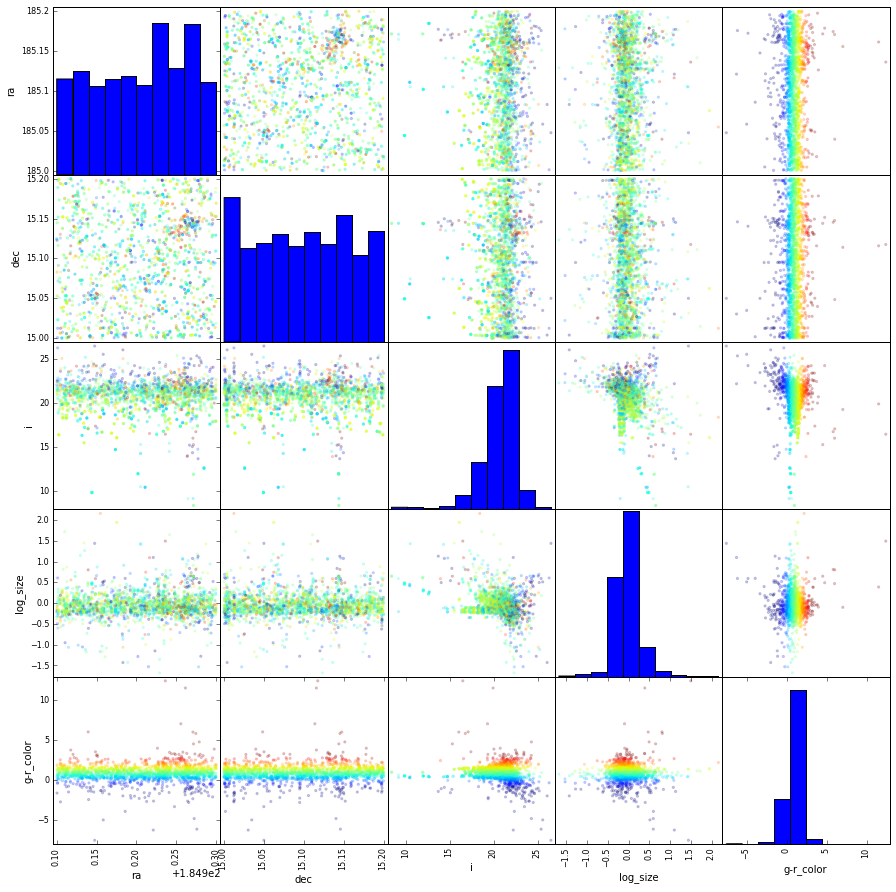

In [8]:
def plot_everything(data,colorizer,vmin=0.0,vmax=10.0):
    # Truncate the color map to retain contrast between faint objects.
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = matplotlib.cm.jet
    m = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
    plot = pd.scatter_matrix(data, alpha=0.2,figsize=[15,15],color=m.to_rgba(data[colorizer]))
    return

plot_everything(data,'g-r_color',vmin=-1.0, vmax=3.0)

## Size-magnitude

Let's zoom in and look at the objects' (log) sizes and magnitudes.

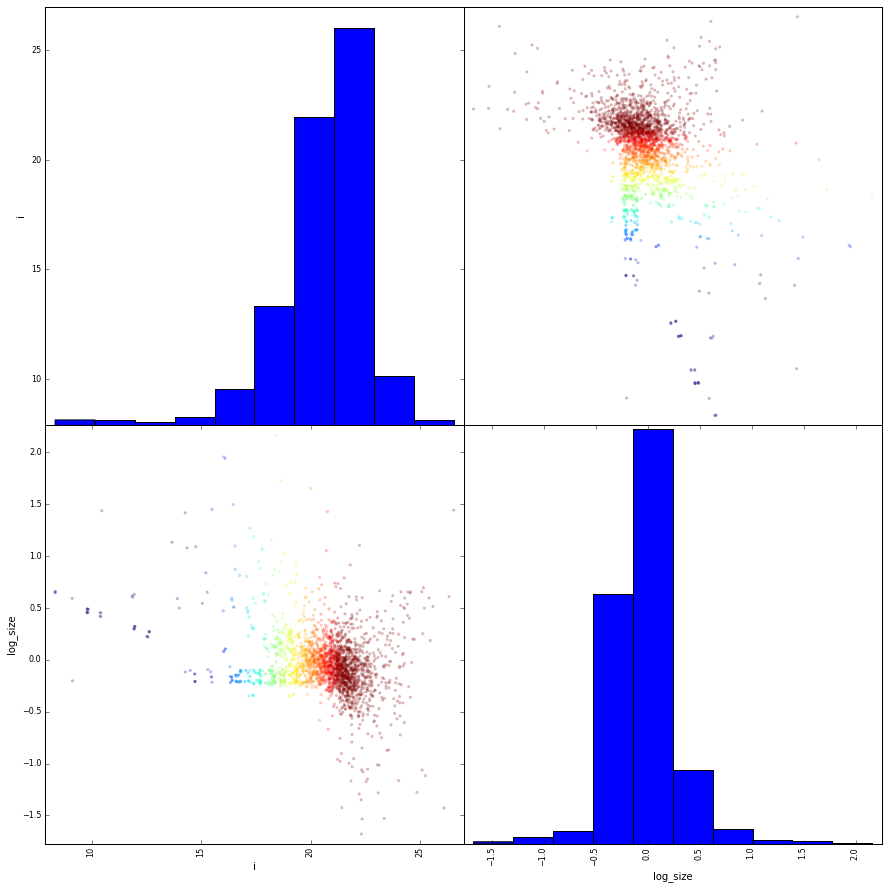

In [9]:
zoom = data.copy()
del zoom['ra'],zoom['dec'],zoom['g-r_color']
plot_everything(zoom,'i',vmin=15.0, vmax=21.5)

### Q: What features do you notice in this plot? 

Talk to your neighbor for a minute or two about all the things that might be going on, and be ready to point things out to the class.